## Importing Necessary Libraries 

In [14]:
import dash
import matplotlib.pyplot as plt
import dash_bootstrap_components as dbc
from dash import dcc, html
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from dash.dependencies import Input, Output

# Load dataset
df = pd.read_csv("C:/Users/youse/OneDrive/Desktop/Employee-Attrition (1).csv")
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Understanding the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.shape

(1470, 35)

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Checking for nulls and duplicates

In [11]:
df.isna().sum().sum()

0

C:\Users\youse\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\Users\youse\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\Users\youse\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\Users\youse\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in

In [10]:
df.duplicated().sum()

0

## Distribution for numerical columns

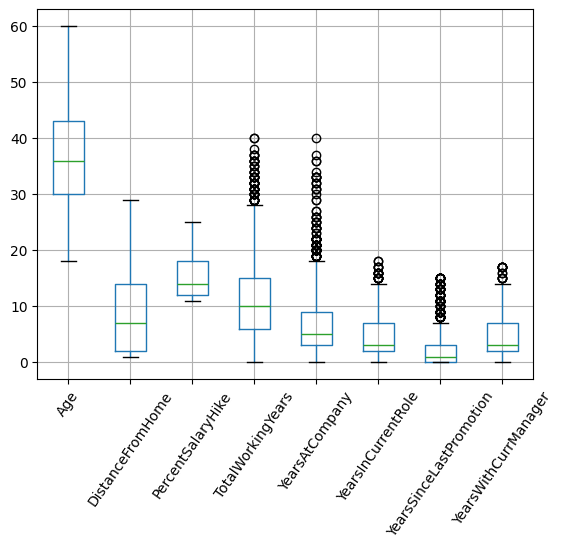

In [15]:
numirecColumns= ['Age','DistanceFromHome','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

df[numirecColumns].boxplot()
plt.xticks(rotation=55)
plt.show()

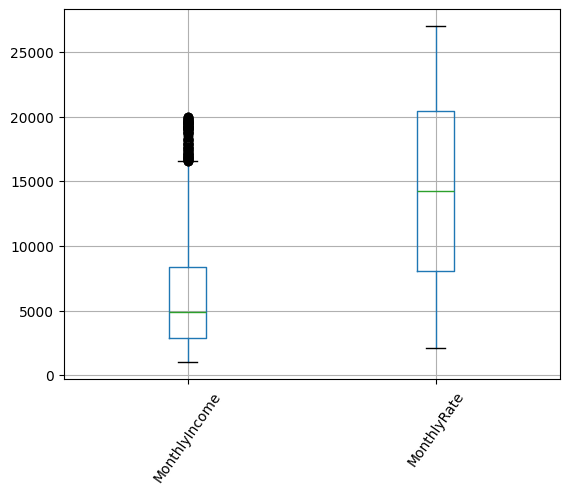

C:\Users\youse\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\Users\youse\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\Users\youse\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\Users\youse\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in

In [17]:
empMonthly=['MonthlyIncome','MonthlyRate']

df[empMonthly].boxplot()
plt.xticks(rotation=55)
plt.show()

In [19]:
import dash
import dash_bootstrap_components as dbc
from dash import dcc, html
import pandas as pd
import plotly.express as px
from dash.dependencies import Input, Output

# Load dataset
df = pd.read_csv("C:/Users/youse/OneDrive/Desktop/Employee-Attrition (1).csv")

# Define a consistent color palette
color_palette = px.colors.qualitative.Plotly

# Initialize the Dash app with Bootstrap
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# App layout
app.layout = dbc.Container([
    html.H1("Employee Attrition Dashboard", className="text-center text-primary mb-4"),

    # Sidebar Filters
    dbc.Row([
        dbc.Col([
            html.Label("Select Education Field"),
            dcc.Dropdown(
                id="education_field",
                options=[{"label": i, "value": i} for i in df["EducationField"].unique()],
                value=df["EducationField"].unique(),
                multi=True
            ),
        ], width=4),
        dbc.Col([
            html.Label("Select Gender"),
            dcc.Dropdown(
                id="gender",
                options=[{"label": i, "value": i} for i in df["Gender"].unique()],
                value=df["Gender"].unique(),
                multi=True
            ),
        ], width=4),
        dbc.Col([
            html.Label("Select Job Role"),
            dcc.Dropdown(
                id="job_role",
                options=[{"label": i, "value": i} for i in df["JobRole"].unique()],
                value=df["JobRole"].unique(),
                multi=True
            ),
        ], width=4),
    ], className="mb-4"),

    # KPI Cards
    dbc.Row([
        dbc.Col(dbc.Card([
            html.H4("Total Employees", className="text-center"),
            html.H2(id="total_employees", className="text-center"),
        ], body=True, color="info", inverse=True), width=4),

        dbc.Col(dbc.Card([
            html.H4("Employees Who Left", className="text-center"),
            html.H2(id="employees_left", className="text-center"),
        ], body=True, color="danger", inverse=True), width=4),

        dbc.Col(dbc.Card([
            html.H4("Average Monthly Income", className="text-center"),
            html.H2(id="avg_income", className="text-center"),
        ], body=True, color="success", inverse=True), width=4),
    ], className="mb-4"),

    # Charts
    dbc.Row([
        dbc.Col(dcc.Graph(id="attrition_by_field"), width=6),
        dbc.Col(dcc.Graph(id="overtime_pie"), width=6),
    ]),
    dbc.Row([
        dbc.Col(dcc.Graph(id="job_role_chart"), width=6),
        dbc.Col(dcc.Graph(id="age_income_bubble"), width=6),
    ]),

    html.Footer("Made with ❤️ using Dash", className="text-center mt-4 text-secondary")
])

# Callback to update KPIs and charts based on filter selections
@app.callback(
    [Output("total_employees", "children"),
     Output("employees_left", "children"),
     Output("avg_income", "children"),
     Output("attrition_by_field", "figure"),
     Output("overtime_pie", "figure"),
     Output("job_role_chart", "figure"),
     Output("age_income_bubble", "figure")],
    [Input("education_field", "value"),
     Input("gender", "value"),
     Input("job_role", "value")]
)
def update_dashboard(selected_edu, selected_gender, selected_job):
    # Filter the data based on selections
    df_filtered = df[
        (df["EducationField"].isin(selected_edu)) & 
        (df["Gender"].isin(selected_gender)) & 
        (df["JobRole"].isin(selected_job))
    ]

    # KPI Values
    total_employees = f"{df_filtered.shape[0]:,}"
    employees_left = f"{df_filtered[df_filtered['Attrition'] == 'Yes'].shape[0]:,}"
    avg_income = f"${df_filtered['MonthlyIncome'].mean():,.2f}"

    # Bar Chart: Attrition by Education Field & Gender
    fig_attrition = px.bar(
        df_filtered[df_filtered["Attrition"] == "Yes"],
        x="EducationField",
        color="Gender",
        title="Attrition by Education Field & Gender",
        color_discrete_sequence=color_palette
    )

    # Pie Chart: Overtime & Attrition Distribution
    overtime_counts = df_filtered.groupby(["OverTime", "Attrition"]).size().reset_index(name="Count")
    overtime_counts["Label"] = overtime_counts["OverTime"] + " - " + overtime_counts["Attrition"]
    fig_overtime = px.pie(
        overtime_counts,
        names="Label",
        values="Count",
        title="Overtime & Attrition Distribution",
        color_discrete_sequence=color_palette
    )

    # Bar Chart: Attrition by Job Role
    job_role_counts = df_filtered.groupby(['JobRole', 'Attrition']).size().unstack()
    fig_job_role = px.bar(
        job_role_counts,
        barmode="stack",
        title="Attrition by Job Role",
        labels={"value": "Number of Employees", "JobRole": "Job Role"},
        color_discrete_sequence=color_palette
    )

    # Bubble Chart: Age vs Monthly Income
    fig_income = px.scatter(
        df_filtered,  # Now filtered!
        x="Age",
        y="MonthlyIncome",
        color="Attrition",
        size="EnvironmentSatisfaction",
        title="Bubble Chart: Age vs Monthly Income",
        opacity=0.6,
        color_discrete_sequence=color_palette,
        size_max=30  # Adjust maximum bubble size for clarity
    )

    return total_employees, employees_left, avg_income, fig_attrition, fig_overtime, fig_job_role, fig_income

# Run the app
if __name__ == "__main__":
    app.run(debug=True)


C:\Users\youse\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\Users\youse\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\Users\youse\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\Users\youse\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in